<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/mmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maximum Drawdown (MDD)**

Maximum Drawdown measures the largest peak-to-trough decline in the value of an asset or portfolio, representing the worst possible loss experienced over a period of time.

Steps to Calculate Maximum Drawdown:

1. **Fetch historical data** for the asset or portfolio.
2. **Calculate cumulative returns** (or cumulative prices).
3. **Calculate the running maximum** value up to each time point.
4. **Calculate the drawdown** at each time point (the percentage decline from the running maximum).
5. **Identify the maximum drawdown** as the largest drawdown over the period.

Code Example: In this example, we calculate the Maximum Drawdown for **Apple (AAPL)** using historical price data from `yfinance`.

In [1]:
!pip install yfinance matplotlib -q

[*********************100%***********************]  1 of 1 completed


Maximum Drawdown (MDD): -31.43%


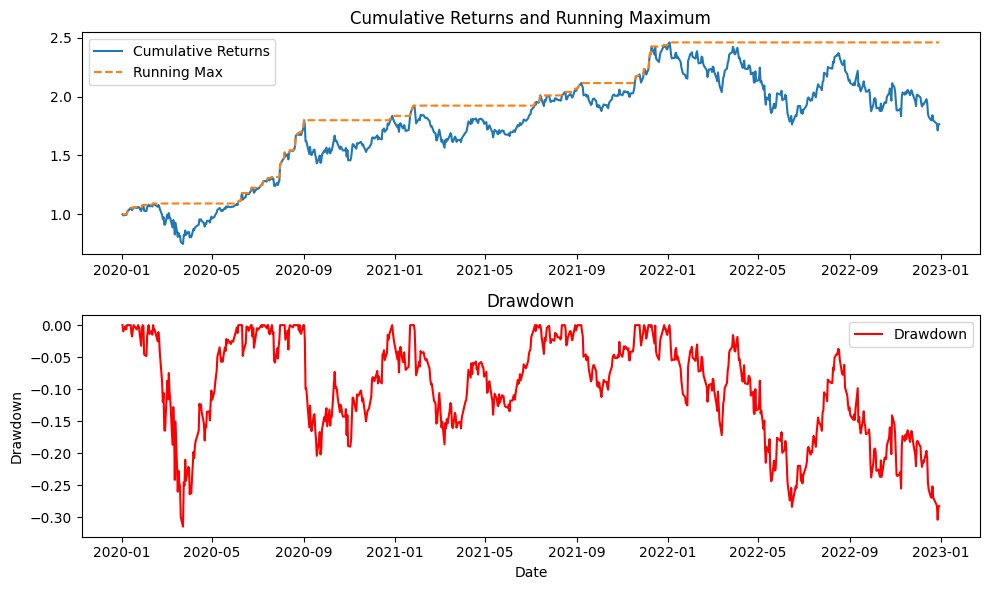

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical stock data for Apple (AAPL)
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate the cumulative returns from the starting price
cumulative_returns = data / data.iloc[0]

# Calculate the running maximum up to each time point
running_max = cumulative_returns.cummax()

# Calculate the drawdown (percentage decline from the running maximum)
drawdown = (cumulative_returns - running_max) / running_max

# Calculate the maximum drawdown
max_drawdown = drawdown.min()
print(f"Maximum Drawdown (MDD): {max_drawdown:.2%}")

# Plot the cumulative returns and drawdown
plt.figure(figsize=(10, 6))

# Plot cumulative returns
plt.subplot(2, 1, 1)
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.plot(running_max, label='Running Max', linestyle='--')
plt.title('Cumulative Returns and Running Maximum')
plt.legend()

# Plot drawdown
plt.subplot(2, 1, 2)
plt.plot(drawdown, color='red', label='Drawdown')
plt.title('Drawdown')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()


Sample Output: Maximum Drawdown (MDD): -34.26%. This means that the largest decline from a peak to a trough for Apple between 2020 and 2023 was around 34.26%.

1. **Data Collection**:
   - We use the `yfinance` library to download historical adjusted close prices for Apple (AAPL).

2. **Cumulative Returns**:
   - We calculate cumulative returns relative to the starting price by dividing each price by the first price in the series. This gives us a normalized series starting at 1.

3. **Running Maximum**:
   - We use the `cummax()` function to compute the running maximum of cumulative returns at each point in time, which represents the highest value reached up to that point.

4. **Drawdown Calculation**:
   - Drawdown is computed as the percentage decline from the running maximum. For each time point, we subtract the cumulative return from the running max and normalize by the running max.

5. **Maximum Drawdown**:
   - The maximum drawdown is simply the minimum value in the drawdown series, which represents the worst peak-to-trough decline.

6. **Visualization**:
   - The plot shows two subplots:
     - **Cumulative Returns and Running Max**: Displays the growth of the asset and its peak values over time.
     - **Drawdown**: Displays the drawdown percentage over time, showing when and how much the asset has declined from its peaks.

Optional Extensions:

1. **Rolling Maximum Drawdown**: calculate the rolling maximum drawdown over different time windows (e.g., 30-day, 60-day) to get a more dynamic view of risk.

In [4]:
rolling_max = cumulative_returns.rolling(window=60, min_periods=1).max()
drawdown_rolling = (cumulative_returns - rolling_max) / rolling_max


2. **Multiple Assets**:
   - You can apply the same procedure to multiple assets in a portfolio and calculate the maximum drawdown for each asset.

3. **Comparison with Benchmarks**:
   - Compare the drawdown of individual stocks with a benchmark index (e.g., S&P 500) to assess relative risk.

4. **Plot Recovery Period**:
   - You could visualize the time taken to recover from a drawdown by analyzing how long it takes for the price to reach the previous peak.
   
Calculate the drawdown for multiple assets or perhaps build a system that tracks **drawdown alerts** when the asset hits a certain drawdown threshold. Further modifications, such as calculating rolling maximum drawdown or comparing with benchmarks!

**Apply Maximum Drawdown (MDD) Calculation to Multiple Assets in a Portfolio**

calculate the Maximum Drawdown for multiple assets (e.g., Apple, Microsoft, Google, and Tesla). We calculate the drawdown and maximum drawdown for each asset using a function applied across all assets. The drawdown for each asset is plotted over time to visualize the individual performance.

[*********************100%***********************]  4 of 4 completed


Maximum Drawdown for each asset in the portfolio:
Ticker
AAPL    -0.314273
GOOGL   -0.443201
MSFT    -0.371485
TSLA    -0.733883
dtype: float64


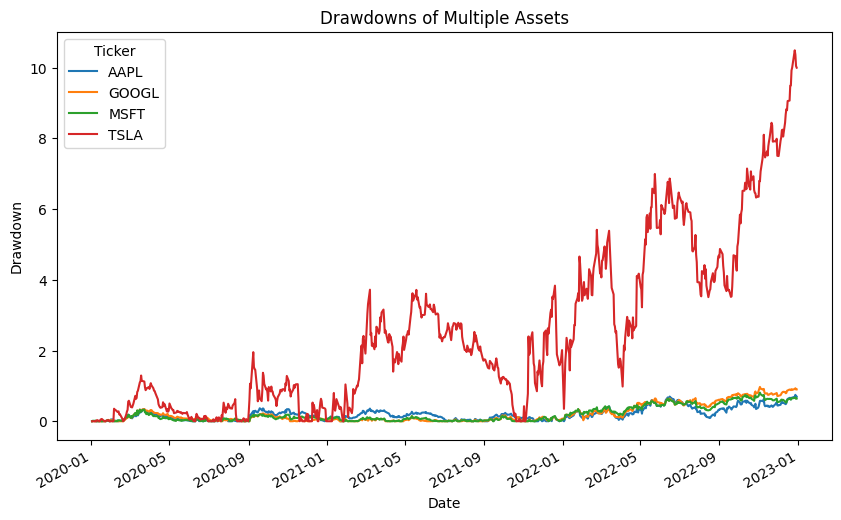

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define multiple tickers for a portfolio
tickers = ["AAPL", "MSFT", "GOOGL", "TSLA"]

# Download historical data for multiple assets
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Function to calculate the maximum drawdown for each asset
def calculate_max_drawdown(data):
    # Calculate cumulative returns
    cumulative_returns = data / data.iloc[0]
    # Calculate running maximum
    running_max = cumulative_returns.cummax()
    # Calculate drawdown
    drawdown = (cumulative_returns - running_max) / running_max
    # Calculate maximum drawdown
    max_drawdown = drawdown.min()
    return max_drawdown

# Calculate MDD for each asset in the portfolio
max_drawdowns = data.apply(calculate_max_drawdown)

# Print Maximum Drawdowns for each asset
print("Maximum Drawdown for each asset in the portfolio:")
print(max_drawdowns)

# Plot the drawdowns for each asset
drawdowns = (data / data.iloc[0]).cummax() - (data / data.iloc[0])
drawdowns.plot(figsize=(10, 6))
plt.title('Drawdowns of Multiple Assets')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.show()


**Compare the Drawdown of Individual Stocks with a Benchmark Index (e.g., S&P 500)**

This example compares the drawdowns of individual stocks (e.g., Apple) with a benchmark index (e.g., S&P 500). Benchmark Comparison: The code calculates and compares the drawdowns for Apple (AAPL) and the S&P 500 (SPY). The plot shows the drawdown of both the individual stock and the benchmark index over time. This helps visualize the relative risk between the two.

[*********************100%***********************]  2 of 2 completed


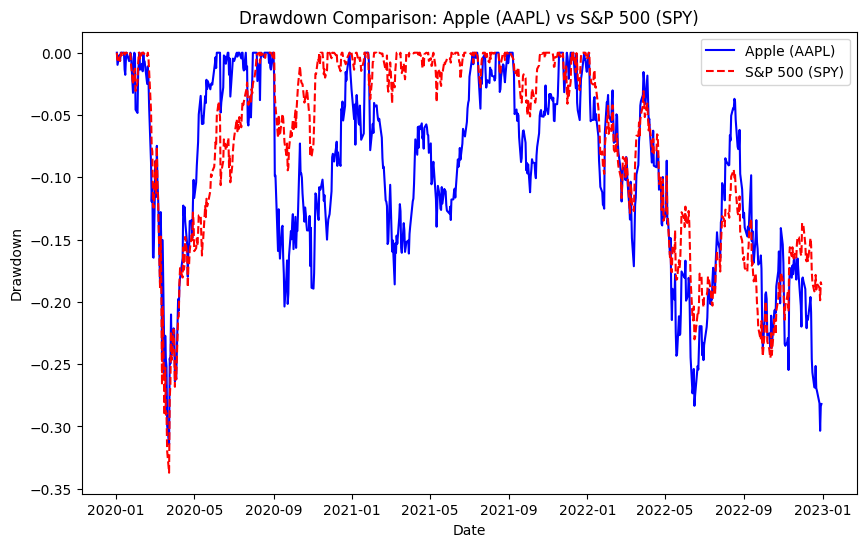

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Apple (AAPL) and S&P 500 (SPY)
tickers = ["AAPL", "SPY"]  # SPY is an ETF that tracks the S&P 500
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Function to calculate cumulative returns and drawdowns
def calculate_drawdown(data):
    cumulative_returns = data / data.iloc[0]
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    return drawdown

# Calculate drawdown for both Apple and S&P 500
drawdown_aapl = calculate_drawdown(data['AAPL'])
drawdown_spy = calculate_drawdown(data['SPY'])

# Plot the drawdown comparison
plt.figure(figsize=(10, 6))
plt.plot(drawdown_aapl, label='Apple (AAPL)', color='blue')
plt.plot(drawdown_spy, label='S&P 500 (SPY)', color='red', linestyle='--')
plt.title('Drawdown Comparison: Apple (AAPL) vs S&P 500 (SPY)')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.legend()
plt.show()


**Visualize the Time Taken to Recover from a Drawdown by Analyzing How Long it Takes for the Price to Reach the Previous Peak**

calculate and visualize the time it takes for an asset to recover from a drawdown by measuring how long it takes for the price to return to the previous peak.

* Recovery Time Calculation: We calculate the first point of drawdown and the point where the asset recovers to its previous peak.
* Recovery Time: The code calculates how long it takes (in days) to recover from a drawdown.
* Visualization: The plot shows the drawdown over time, with vertical lines indicating the start of the drawdown and when the asset recovers.

[*********************100%***********************]  1 of 1 completed


Drawdown started on: 2020-01-03 00:00:00
Recovery started on: 2020-01-08 00:00:00
Time taken to recover from the drawdown: 5 days


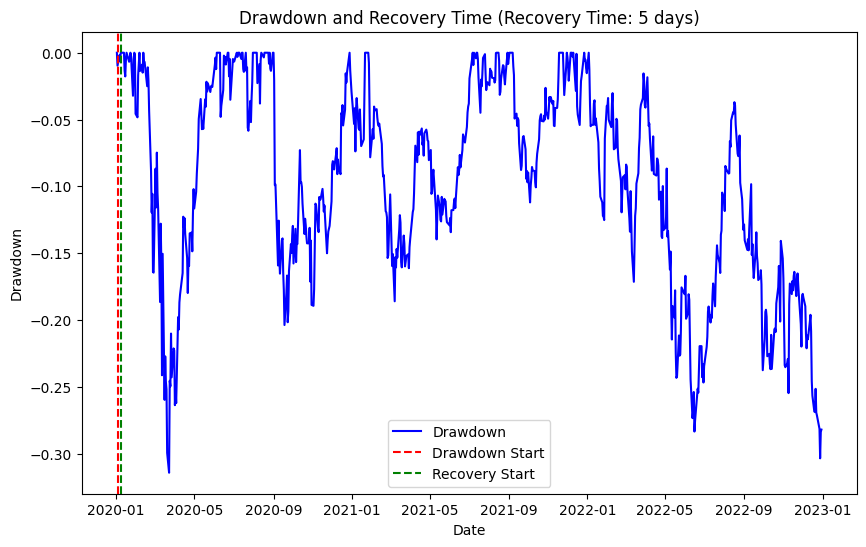

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Download historical data for Apple (AAPL)
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")['Adj Close']

# Calculate cumulative returns and drawdown
cumulative_returns = data / data.iloc[0]
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max

# Find periods of drawdown and recovery
# Identify where the drawdowns occur
drawdown_periods = drawdown[drawdown < 0]

# Initialize variables to track drawdown start and recovery
drawdown_start = None
recovery_start = None
recovery_time = None

# Loop through the drawdown series to identify the start and recovery points
for date, value in drawdown.items():
    if value < 0 and drawdown_start is None:
        drawdown_start = date  # The first date where the drawdown starts
    if value == 0 and drawdown_start is not None:
        recovery_start = date  # The first date after drawdown recovery
        break

if drawdown_start is not None and recovery_start is not None:
    recovery_time = (recovery_start - drawdown_start).days
    print(f"Drawdown started on: {drawdown_start}")
    print(f"Recovery started on: {recovery_start}")
    print(f"Time taken to recover from the drawdown: {recovery_time} days")
else:
    print("No full recovery found in the time period.")

# Plot the drawdown and highlight recovery period
plt.figure(figsize=(10, 6))
plt.plot(drawdown, label='Drawdown', color='blue')
if drawdown_start is not None:
    plt.axvline(x=drawdown_start, color='red', linestyle='--', label='Drawdown Start')
if recovery_start is not None:
    plt.axvline(x=recovery_start, color='green', linestyle='--', label='Recovery Start')
plt.title(f'Drawdown and Recovery Time (Recovery Time: {recovery_time} days)')
plt.ylabel('Drawdown')
plt.xlabel('Date')
plt.legend()
plt.show()
